#### Representing Neural Networks

Artificial neural networks:
    
   Atificial neural networks draw some inspiration from biological neural networks,A deep neural network is a specific type of neural network that excels at capturing nonlinear relationships in data. Deep neural networks have some ability to discover how to structure the nonlinear transformations during the training process automatically and have grown to become a helpful tool for many problems.

Neural network are usually represented as graphs. A graph is a data structure consists of nodes that are connected by edges.Graphs are commonly used to represent how components of a system are related or linked.

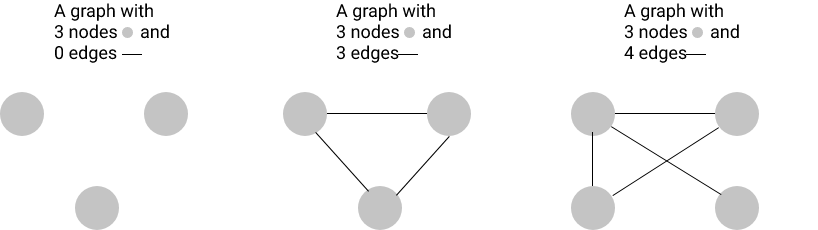






Graph are flexible data structure through graph.we can represent a list of values as a graph.

Graph let us to build a pipeline of a function that need to executed sequence.A computational graph uses nodes to describe variables and edges to describe how variables are combined,A decision tree is a specific type of computational graph

#### Generating Regression Data

Generating data by ourselves gives us more control of the properties of the data set by using

1) sklearn.datasets.make_regression()
2) sklearn.datasets.make_classification()
3) sklearn.datasets.make_moons()

The dataset consists of features, observations, and the noise in the features

In [1]:
from sklearn.datasets import make_regression
data= make_regression(n_samples=10, n_features=3, random_state=1)

The above code will generates a regression data set with 3 features, 1000 observations, and a random seed of 1.
The features are stored in the first NumPy array and the labels in the second NumPy array:

In [2]:
print(type(data))

<class 'tuple'>


In [3]:
#Features
print(data[0])

[[-0.68372786 -0.12289023  0.90085595]
 [-0.38405435  1.13376944 -0.3224172 ]
 [ 0.86540763 -2.3015387  -1.07296862]
 [-0.26788808  0.53035547 -0.93576943]
 [-0.17242821 -0.87785842 -1.09989127]
 [-0.7612069   0.3190391   1.74481176]
 [ 0.90159072  0.50249434  1.14472371]
 [-0.61175641 -0.52817175  1.62434536]
 [ 0.58281521 -1.10061918  0.04221375]
 [ 1.46210794 -2.06014071 -0.24937038]]


In [4]:
#first row
print(data[0][0])

[-0.68372786 -0.12289023  0.90085595]


In [5]:
#labels
print(data[1])

[ 16.79599588 -12.07640944 -24.08199932 -29.38530983 -35.59436225
  40.93139665  45.63875939  37.7671644    6.66150601   7.84545048]


In [6]:
## First label
print(data[1][0])

16.79599587508764


In [7]:
from sklearn.datasets import make_regression
import pandas as pd
data = make_regression(n_samples=100, n_features=3, random_state=1)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

In [8]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
import numpy as np
data = make_regression(n_samples=100, n_features=3, random_state=1)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

features['bias'] = 1
def train(features, labels):
    lr = SGDRegressor()
    lr.fit(features,labels)
    weights =lr.coef_
    print(weights)
    return weights

def feedforward(features, weights):
    predictions =np.dot(features, weights.T)
    return predictions

train_weights=train(features,labels)
linear_predictions = feedforward(features, train_weights)

[4.41628553e+01 9.89060851e+01 5.81043144e+01 9.42641425e-03]


##### Fitting A Linear Regression Neural Network
Gradeint descent is most common technique for fitting neural network models,By using scikit-learn implementation of gradient descent SGDRegressor class

In [11]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
import numpy as np
data = make_regression(n_samples=100, n_features=3, random_state=1)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

features['bias'] = 1
def train(features, labels):
    lr = SGDRegressor()
    lr.fit(features,labels)
    weights =lr.coef_
    return weights

def feedforward(features, weights):
    predictions =np.dot(features, weights.T)
    return predictions

train_weights=train(features,labels)
linear_predictions = feedforward(features, train_weights)
linear_predictions 

array([ -10.35684292,   25.47085463,   19.67466333,  149.38880098,
       -121.55678824,   90.22317423,  213.86829394,  224.58868287,
        -73.12102315, -195.47095292,  -52.41674764,  201.65863748,
         20.27274252,   89.12271832,   -4.42742045,  -45.43342441,
         56.86141214,  120.47819786,  -66.15931031,  -43.80791415,
         34.25478352,  -77.4158013 ,  -26.87519782,  197.07835955,
         64.39080891,  -58.2093815 , -100.53350482,  120.22369278,
       -324.38800483,   11.79602476, -178.20208052,  -12.08911815,
        -25.19757266,  162.13935892,  101.18954789,  128.45204532,
        -21.91820648,  141.4812743 ,   70.72502951,   42.74036809,
       -129.81024132,   75.59233262,    7.75525943,   27.81852423,
        -55.97588275,  -45.07132759,   -4.7943356 , -224.73058578,
        -73.96595549,   32.45794687, -145.66406497,   70.37806855,
        130.98692988,  152.6514687 ,   -5.78531097,  125.96848931,
       -193.90173087,  -16.04072236,  -64.58765423,   89.20554

#### Genrating Classification Data

To implement a network that performs classification, the only thing we need to change from the linear regression network we implemented is the activation function. Instead of using the identity function, we need to use the sigmoid function.

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification

class_data = make_classification(n_samples=100, n_features=4, random_state=1)
class_features = pd.DataFrame(class_data[0])
class_labels = pd.Series(class_data[1])

class_features ['bias'] = 1
def log_train(class_features, class_labels):
    clr = SGDClassifier()
    clr.fit(class_features, class_labels)
    weight = clr.coef_
    return weight

def sigmoid(linear_combination):
    return 1/(1+np.exp(-linear_combination))

    
def log_feedforward(class_features, log_train_weights):
    linear_combination = np.dot(class_features,log_train_weights.T)
    log_predictions =sigmoid(linear_combination)
    log_predictions[log_predictions >=0.5] =1
    log_predictions[log_predictions <=0.5] = 0
    return log_predictions


# Uncomment this code when you're ready to test your functions.
log_train_weights = log_train(class_features, class_labels)
log_predictions = log_feedforward(class_features, log_train_weights)
